<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/airline_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df= pd.read_csv("/content/airlines_flights_data.csv")

In [30]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [32]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [33]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [34]:
df.select_dtypes(include='int64')

,index,days_left,price
0,0,1,5953
1,1,1,5953
2,2,1,5956
3,3,1,5955
4,4,1,5955
...,...,...,...
300148,300148,49,69265
300149,300149,49,77105
300150,300150,49,79099
300151,300151,49,81585


In [35]:
num_cols= ['days_left','price','duration']

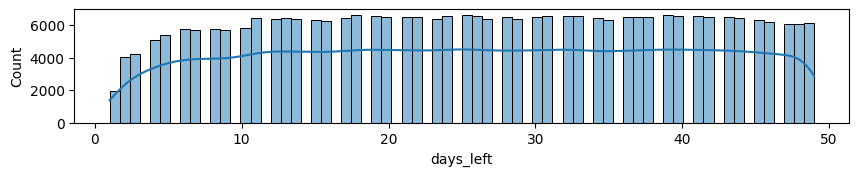

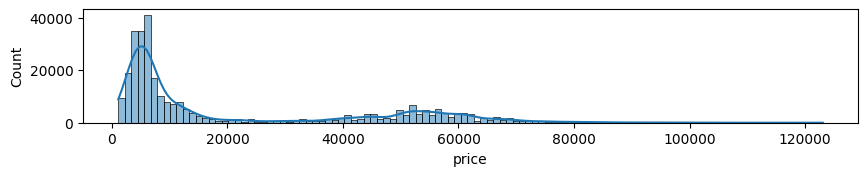

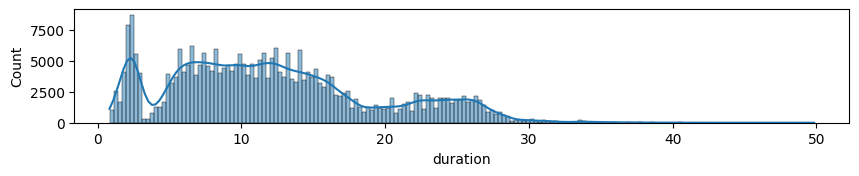

In [36]:
for i, col in enumerate(num_cols):
  plt.figure(figsize=(10,5))
  plt.subplot(3,1,i+1)
  sns.histplot(df[col],kde=True)
  plt.show()

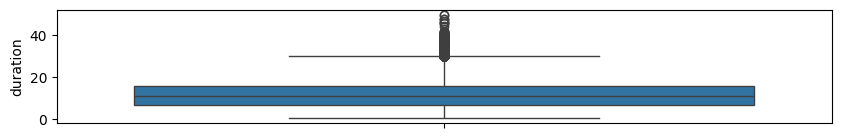

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,i+1)
sns.boxplot(df[col])
plt.show()

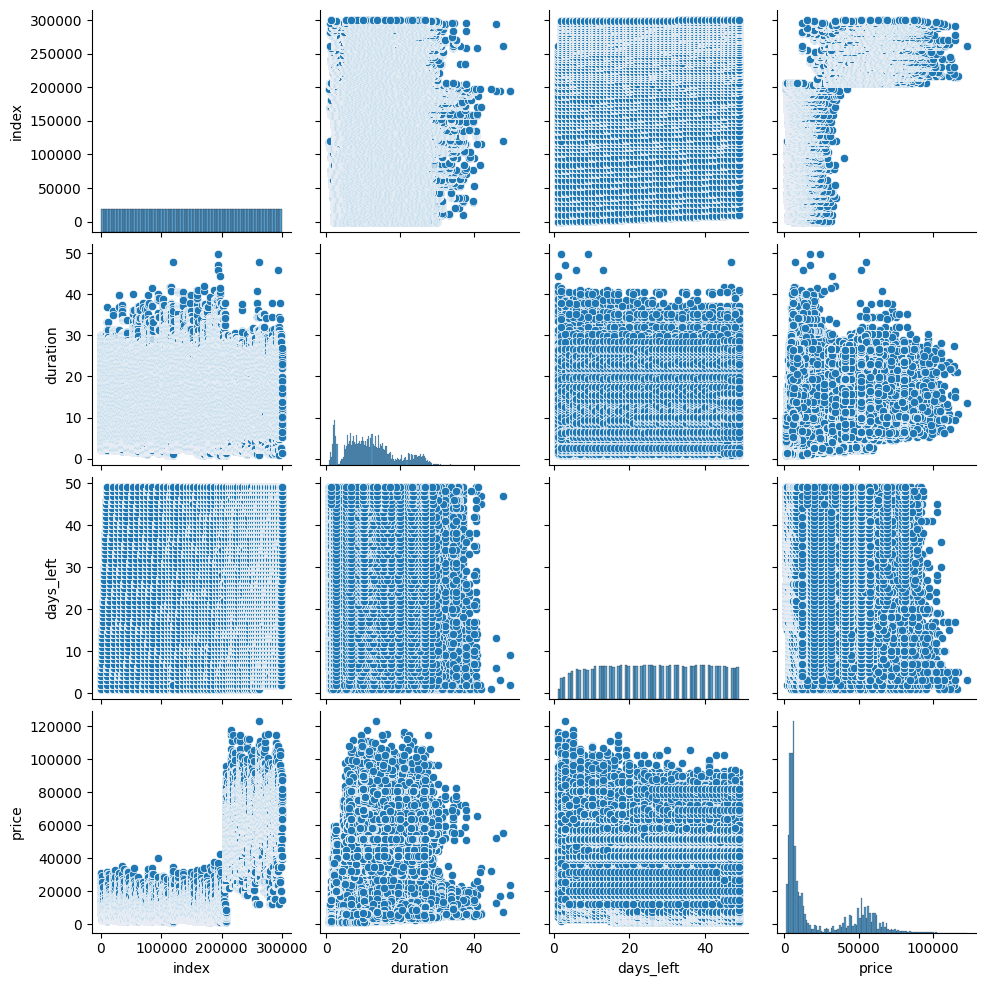

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
airline_count= df["airline"].value_counts()

In [40]:
airline_count

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


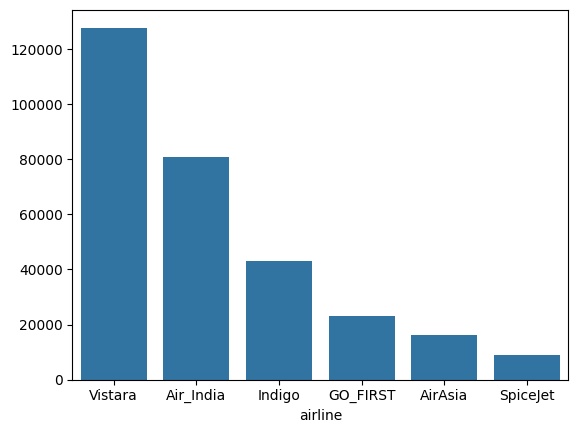

In [41]:
sns.barplot(x=airline_count.index, y= airline_count.values)
plt.show()

In [42]:
city_counts= df["source_city"].value_counts()

In [43]:
city_counts

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


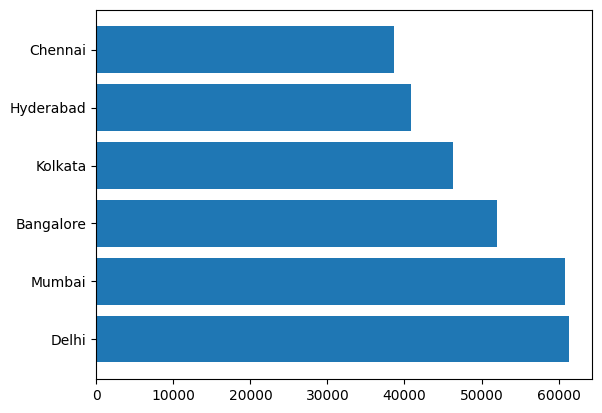

In [44]:
plt.barh(y=city_counts.index, width= city_counts.values)
plt.show()

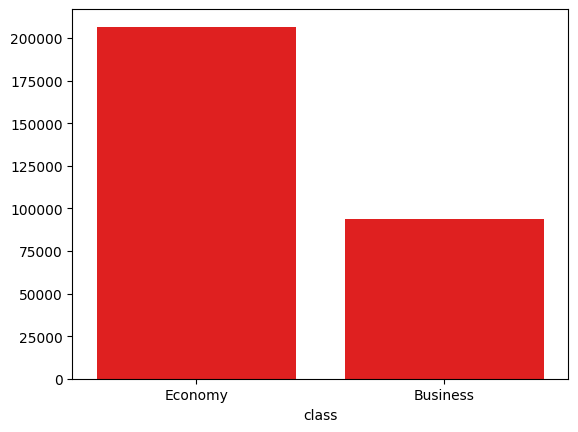

In [45]:
class_count= df["class"].value_counts()
sns.barplot(x= class_count.index, y=class_count.values, color="red")
plt.show()

In [46]:
airline_duration=df.groupby("airline")["duration"].mean()

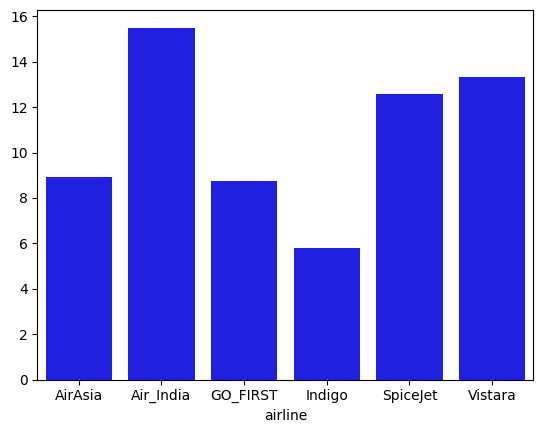

In [47]:
sns.barplot(x=airline_duration.index, y= airline_duration.values, color="blue")
plt.show()

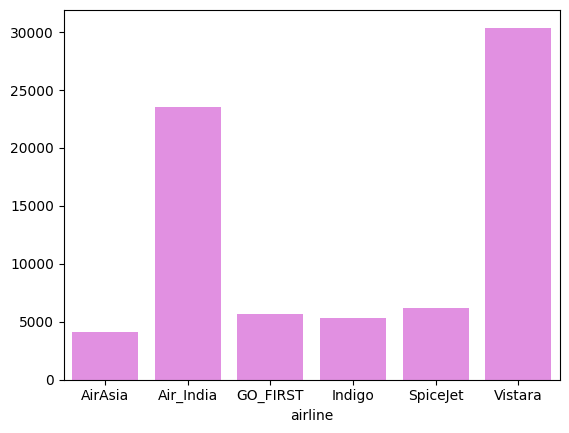

In [48]:
airline_price= df.groupby("airline")["price"].mean()
sns.barplot(x= airline_price.index, y= airline_price.values, color="violet")
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [50]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [51]:
cat_col= ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class']
for col in cat_col:
  le= LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [52]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [53]:
X= df.drop(['price','index'], axis=1)

In [54]:
y= df["price"]

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
mse= mean_squared_error(y_test, y_pred_lr)
r2= r2_score(y_test, y_pred_lr)

In [62]:
mse, r2

(49189755.07132977, 0.9045752733051884)